# Inspect COCO Detection torchvision Dataset

In [1]:
from pprint import pprint, pformat
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.utils.data.dataloader as dataloader
import torchvision
from torchvision import transforms
from torchvision.transforms import v2
from torchvision.utils import draw_bounding_boxes
from torch.utils.data import ConcatDataset
from torchvision import tv_tensors
from torchvision.datasets import wrap_dataset_for_transforms_v2
from torchvision.ops import box_convert
from torchvision import tv_tensors
# palette is a list of color tuples, which is used for visualization.
palette =  [(106, 0, 228), (119, 11, 32), (165, 42, 42), (0, 0, 192),
            (197, 226, 255), (0, 60, 100), (0, 0, 142), (255, 77, 255),
            (153, 69, 1), (120, 166, 157), (0, 182, 199),
            (0, 226, 252), (182, 182, 255), (0, 0, 230), (220, 20, 60),
            (163, 255, 0), (0, 82, 0), (3, 95, 161), (0, 80, 100),
            (183, 130, 88)]
COCO_CATEGORIES = [  # 91 obj categories + 1 background category
    '__background__',
    'person',
    'bicycle',
    'car',
    'motorbike',
    'aeroplane',
    'bus',
    'train',
    'truck',
    'boat',
    'trafficlight',
    'firehydrant',
    'streetsign',
    'stopsign',
    'parkingmeter',
    'bench',
    'bird',
    'cat',
    'dog',
    'horse',
    'sheep',
    'cow',
    'elephant',
    'bear',
    'zebra',
    'giraffe',
    'hat',
    'backpack',
    'umbrella',
    'shoe',
    'eyeglasses',
    'handbag',
    'tie',
    'suitcase',
    'frisbee',
    'skis',
    'snowboard',
    'sportsball',
    'kite',
    'baseballbat',
    'baseballglove',
    'skateboard',
    'surfboard',
    'tennisracket',
    'bottle',
    'plate',
    'wineglass',
    'cup',
    'fork',
    'knife',
    'spoon',
    'bowl',
    'banana',
    'apple',
    'sandwich',
    'orange',
    'broccoli',
    'carrot',
    'hotdog',
    'pizza',
    'donut',
    'cake',
    'chair',
    'sofa',
    'pottedplant',
    'bed',
    'mirror',
    'diningtable',
    'window',
    'desk',
    'toilet',
    'door',
    'tvmonitor',
    'laptop',
    'mouse',
    'remote',
    'keyboard',
    'cellphone',
    'microwave',
    'oven',
    'toaster',
    'sink',
    'refrigerator',
    'blender',
    'book',
    'clock',
    'vase',
    'scissors',
    'teddybear',
    'hairdrier',
    'toothbrush',
    'hairbrush',
]

## Check sample data

In [2]:
dataset_train = torchvision.datasets.CocoDetection(root='../data/coco/images/train2017',
                                                   annFile='../data/coco/annotations/instances_train2017.json',
                                                   transform=v2.Compose([v2.ToImage(), v2.ToDtype(torch.uint8, scale=True)]))
dataset_val = torchvision.datasets.CocoDetection(root='../data/coco/images/val2017',
                                                 annFile='../data/coco/annotations/instances_val2017.json',
                                                 transform=v2.Compose([v2.ToImage(), v2.ToDtype(torch.uint8, scale=True)]))

loading annotations into memory...
Done (t=8.51s)
creating index...
index created!
loading annotations into memory...
Done (t=1.31s)
creating index...
index created!


Len of dataset_train: 118,287
Len of dataset_val: 5,000
Sample:
Image: Image([[[163, 161, 160,  ..., 254, 254, 255],
        [162, 160, 166,  ..., 254, 254, 255],
        [160, 159, 165,  ..., 254, 255, 255],
        ...,
        [ 21,  27,  19,  ...,   6,  33,  33],
        [ 20,  27,  19,  ...,   0,   6,  12],
        [ 17,  24,  18,  ...,   0,   2,   3]],

       [[200, 198, 196,  ..., 254, 254, 255],
        [199, 197, 203,  ..., 254, 254, 255],
        [200, 196, 202,  ..., 254, 255, 255],
        ...,
        [ 34,  39,  31,  ...,   8,  40,  43],
        [ 32,  39,  33,  ...,   0,   7,  13],
        [ 29,  36,  32,  ...,   1,   3,   4]],

       [[227, 224, 220,  ..., 254, 254, 255],
        [226, 223, 229,  ..., 254, 254, 255],
        [226, 223, 228,  ..., 254, 255, 255],
        ...,
        [ 24,  29,  21,  ...,   3,  32,  32],
        [ 20,  27,  20,  ...,   2,   9,  15],
        [ 17,  24,  19,  ...,   3,   5,   6]]], dtype=torch.uint8, ) (type(x)=<class 'torchvision.tv_ten

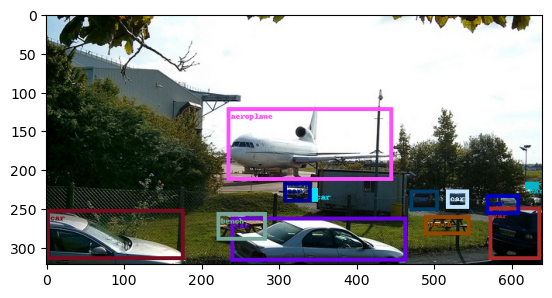

In [3]:
print(f"Len of dataset_train: {len(dataset_train):,}")
print(f"Len of dataset_val: {len(dataset_val):,}")

print("Sample:")
x, y = dataset_train[1358]
print(f"Image: {x} ({type(x)=}), hw={x.shape}")  # Before transforms, it's a tv_tensors.Image with non-fixed size
print(f"Label: {pformat(y)} ({type(y)=})")
print(f"Bounding boxes:")
boxes = []
labels = []
for obj in y:
    boxes.append(box_convert(torch.tensor(obj['bbox']), in_fmt='xywh', out_fmt='xyxy'))
    labels.append(COCO_CATEGORIES[obj['category_id']])
    print(f"  {COCO_CATEGORIES[obj['category_id']]}({obj['category_id']}): {obj['bbox']}")
img = draw_bounding_boxes(x, boxes=torch.stack(boxes),
                          labels=labels, colors=[palette[i%len(palette)] for i in range(len(boxes))], width=5)
plt.imshow(img.permute(1, 2, 0))

In [4]:
class_idxs = []
for idx_img in range(len(dataset_train)):
    _, y = dataset_train[idx_img]
    for obj in y:
        class_idxs.append(obj['category_id'])
class_idxs = np.array(class_idxs)
print(f"Number of unique classes: {len(np.unique(class_idxs))}")

Number of unique classes: 80


## Wrap by v2

In [5]:
dataset_train = torchvision.datasets.CocoDetection(root='../data/coco/images/train2017',
                                                   annFile='../data/coco/annotations/instances_train2017.json')  # x1y1wh format
print("Without v2 wrap:")
x, y = dataset_train[2]
print(x, pformat(y), sep='\n')
print(y[0].keys())

dataset_train_v2 = wrap_dataset_for_transforms_v2(dataset_train)  # x1y1x2y2 format
print("\nWith v2 wrap & target_keys=None:")
x, y = dataset_train_v2[2]
print(x, pformat(y), sep='\n')
print(y.keys())
print(f"labels2categories: {[COCO_CATEGORIES[idx] for idx in y['labels']]}")

dataset_train_v2 = wrap_dataset_for_transforms_v2(dataset_train, target_keys='all')
print("\nWith v2 wrap & target_keys='all':")
x, y = dataset_train_v2[2]
print(x, pformat(y), sep='\n')
print(y.keys())

loading annotations into memory...
Done (t=7.71s)
creating index...
index created!
Without v2 wrap:
<PIL.Image.Image image mode=RGB size=640x428 at 0x78B757BD6080>
[{'area': 47675.66289999999,
  'bbox': [204.86, 31.02, 254.88, 324.12],
  'category_id': 64,
  'id': 291613,
  'image_id': 30,
  'iscrowd': 0,
  'segmentation': [[267.38,
                    330.14,
                    281.81,
                    314.75,
                    299.12,
                    282.05,
                    281.81,
                    258.96,
                    248.14,
                    224.34,
                    242.37,
                    189.71,
                    213.52,
                    186.83,
                    237.56,
                    160.86,
                    214.48,
                    156.05,
                    224.1,
                    134.89,
                    204.86,
                    128.16,
                    204.86,
                    109.89,
                    20

## Remove samples with corrupted annotation

Missing annotation could cause some transforms to failed, e.g., v2.SanitizeBoundingBoxes.

**But, by doing so, background images will be removed from the dataset.**

**So, latter, we will use add_img_border_box() to add empty annotation instead of dropping as _coco_remove_images_without_annotations().**

In [6]:
dataset_train = torchvision.datasets.CocoDetection(root='../data/coco/images/train2017',
                                                   annFile='../data/coco/annotations/instances_train2017.json')
dataset_train_v2 = wrap_dataset_for_transforms_v2(dataset_train, target_keys='all')
print("\nWith v2 wrap & target_keys='all':")
x, y = dataset_train_v2[2]
print(x, pformat(y), sep='\n')
print(y.keys())

loading annotations into memory...
Done (t=9.94s)
creating index...
index created!

With v2 wrap & target_keys='all':
<PIL.Image.Image image mode=RGB size=640x428 at 0x78B757BD5A50>
{'area': [47675.66289999999, 16202.798250000003],
 'bbox': [[204.86, 31.02, 254.88, 324.12], [237.56, 155.81, 166.4, 195.25]],
 'boxes': BoundingBoxes([[204.8600,  31.0200, 459.7400, 355.1400],
               [237.5600, 155.8100, 403.9600, 351.0600]], format=BoundingBoxFormat.XYXY, canvas_size=(428, 640)),
 'category_id': [64, 86],
 'image_id': 30,
 'iscrowd': [0, 0],
 'labels': tensor([64, 86]),
 'masks': Mask([[[0, 0, 0,  ..., 0, 0, 0],
       [0, 0, 0,  ..., 0, 0, 0],
       [0, 0, 0,  ..., 0, 0, 0],
       ...,
       [0, 0, 0,  ..., 0, 0, 0],
       [0, 0, 0,  ..., 0, 0, 0],
       [0, 0, 0,  ..., 0, 0, 0]],

      [[0, 0, 0,  ..., 0, 0, 0],
       [0, 0, 0,  ..., 0, 0, 0],
       [0, 0, 0,  ..., 0, 0, 0],
       ...,
       [0, 0, 0,  ..., 0, 0, 0],
       [0, 0, 0,  ..., 0, 0, 0],
       [0, 0, 0,  .

In [7]:
# Example of corruption: no annotations
dataset_train_v2[42]

(<PIL.Image.Image image mode=RGB size=640x480 at 0x78B757BD4BE0>,
 {'image_id': 250})

Ref: https://github.com/pytorch/vision/blob/main/references/detection/coco_utils.py#L230

In [5]:
def _coco_remove_images_without_annotations(dataset, cat_list=None):
    def _has_only_empty_bbox(anno):
        return all(any(o <= 1 for o in obj["bbox"][2:]) for obj in anno)

    def _has_valid_annotation(anno):
        # if it's empty, there is no annotation
        if len(anno) == 0:
            return False
        # if all boxes have close to zero area, there is no annotation
        if _has_only_empty_bbox(anno):
            return False
        return True

    ids = []
    for ds_idx, img_id in enumerate(dataset.ids):
        ann_ids = dataset.coco.getAnnIds(imgIds=img_id, iscrowd=None)
        anno = dataset.coco.loadAnns(ann_ids)
        if cat_list:
            anno = [obj for obj in anno if obj["category_id"] in cat_list]
        if _has_valid_annotation(anno):
            ids.append(ds_idx)

    dataset = torch.utils.data.Subset(dataset, ids)
    return dataset

We only need to remove corrupted labels for training data since validation data won't be augmented and thus no SanitizeBoundingBoxes is needed.

In [9]:
dataset_train_v2 = _coco_remove_images_without_annotations(dataset_train_v2)
dataset_train_v2[42]

(<PIL.Image.Image image mode=RGB size=640x480 at 0x78B757B15480>,
 {'image_id': 257,
  'boxes': BoundingBoxes([[ 89.3000, 197.2400, 112.8300, 230.0200],
                 [ 50.2700, 199.1300,  75.3600, 222.8900],
                 [176.1600, 362.2100, 226.5600, 417.7000],
                 [249.1700, 277.9600, 454.1100, 400.9300],
                 [508.4500, 304.4800, 639.2100, 368.3600],
                 [139.5700, 345.5800, 211.0900, 480.0000],
                 [236.7400, 326.4600, 265.1200, 406.1800],
                 [211.6200, 332.4900, 233.9000, 392.9800],
                 [264.0900, 330.6500, 280.4600, 403.5300],
                 [287.8300, 337.1400, 320.9800, 414.1400],
                 [570.9800, 327.7900, 585.7300, 370.0300],
                 [125.1900, 325.4500, 135.3200, 362.4800],
                 [316.7200, 334.1300, 336.8900, 408.9300],
                 [ 77.6500, 326.4100,  97.9500, 374.5800],
                 [138.1100, 325.5900, 153.6600, 364.0400],
                 [225

## v2 transforms + wrap by v2

loading annotations into memory...
Done (t=8.99s)
creating index...
index created!
Try 1:
x=Image([[[0.1804, 0.1765, 0.1804,  ..., 0.1333, 0.1608, 0.1608],
        [0.1647, 0.1647, 0.1647,  ..., 0.1647, 0.1804, 0.1961],
        [0.1451, 0.1451, 0.1451,  ..., 0.1922, 0.2078, 0.2157],
        ...,
        [0.8118, 0.8196, 0.8235,  ..., 0.7647, 0.7647, 0.7647],
        [0.8196, 0.8196, 0.8196,  ..., 0.7647, 0.7647, 0.7647],
        [0.8196, 0.8196, 0.8196,  ..., 0.7647, 0.7647, 0.7647]],

       [[0.3608, 0.3569, 0.3569,  ..., 0.2314, 0.2431, 0.2471],
        [0.3529, 0.3529, 0.3529,  ..., 0.2471, 0.2627, 0.2902],
        [0.3529, 0.3529, 0.3529,  ..., 0.2745, 0.2902, 0.3059],
        ...,
        [0.8118, 0.8196, 0.8235,  ..., 0.7961, 0.7961, 0.7961],
        [0.8196, 0.8196, 0.8196,  ..., 0.7961, 0.7961, 0.7961],
        [0.8196, 0.8196, 0.8196,  ..., 0.7961, 0.7961, 0.7961]],

       [[0.1490, 0.1451, 0.1333,  ..., 0.1961, 0.1843, 0.1922],
        [0.1490, 0.1490, 0.1373,  ..., 0.2275,

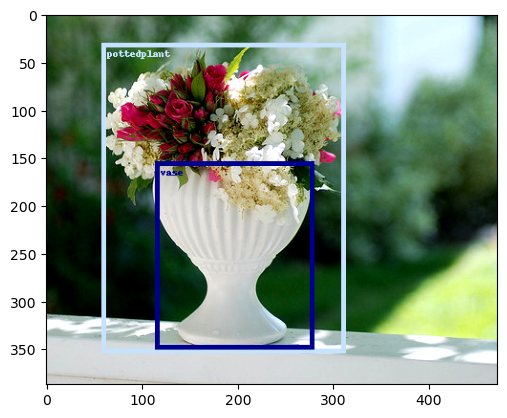

Try 2:
x=Image([[[0.4824, 0.4824, 0.4824,  ..., 0.4824, 0.4824, 0.4824],
        [0.4824, 0.4824, 0.4824,  ..., 0.4824, 0.4824, 0.4824],
        [0.4824, 0.4824, 0.4824,  ..., 0.4824, 0.4824, 0.4824],
        ...,
        [0.4824, 0.4824, 0.4824,  ..., 0.4824, 0.4824, 0.4824],
        [0.4824, 0.4824, 0.4824,  ..., 0.4824, 0.4824, 0.4824],
        [0.4824, 0.4824, 0.4824,  ..., 0.4824, 0.4824, 0.4824]],

       [[0.4588, 0.4588, 0.4588,  ..., 0.4588, 0.4588, 0.4588],
        [0.4588, 0.4588, 0.4588,  ..., 0.4588, 0.4588, 0.4588],
        [0.4588, 0.4588, 0.4588,  ..., 0.4588, 0.4588, 0.4588],
        ...,
        [0.4588, 0.4588, 0.4588,  ..., 0.4588, 0.4588, 0.4588],
        [0.4588, 0.4588, 0.4588,  ..., 0.4588, 0.4588, 0.4588],
        [0.4588, 0.4588, 0.4588,  ..., 0.4588, 0.4588, 0.4588]],

       [[0.4078, 0.4078, 0.4078,  ..., 0.4078, 0.4078, 0.4078],
        [0.4078, 0.4078, 0.4078,  ..., 0.4078, 0.4078, 0.4078],
        [0.4078, 0.4078, 0.4078,  ..., 0.4078, 0.4078, 0.4078],
 

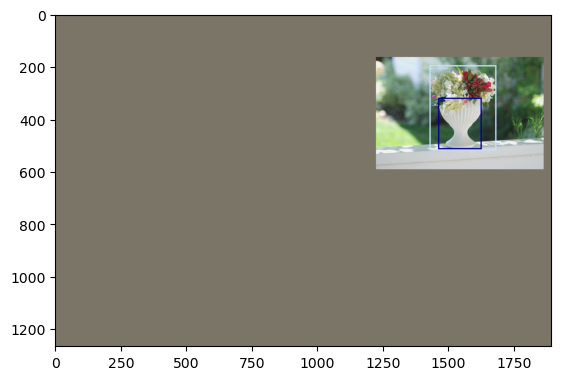

In [10]:
transforms = v2.Compose(
    [
        v2.ToImage(),
        v2.RandomPhotometricDistort(),
        v2.RandomZoomOut(fill={tv_tensors.Image: (123.0, 117.0, 104.0), "others": 0}),
        v2.RandomIoUCrop(),
        v2.RandomHorizontalFlip(),
        v2.ClampBoundingBoxes(),
        v2.SanitizeBoundingBoxes(),
        v2.ToDtype(torch.float32, scale=True),
    ]
)
dataset_train = torchvision.datasets.CocoDetection(root='../data/coco/images/train2017',
                                                   annFile='../data/coco/annotations/instances_train2017.json',
                                                   transforms=transforms)
dataset_train_v2 = wrap_dataset_for_transforms_v2(dataset_train, target_keys=['boxes', 'labels'])
dataset_train_v2 = _coco_remove_images_without_annotations(dataset_train_v2)

for i in range(2):
    print(f"Try {i+1}:")
    x, y = dataset_train_v2[2]
    print(f"{x=}\n{y=}")
    labels = [COCO_CATEGORIES[idx] for idx in y['labels']]
    img = draw_bounding_boxes(v2.functional.to_dtype(x, torch.uint8, scale=True), labels=labels, boxes=y['boxes'],
                              colors=[palette[idx%len(palette)] for idx in y['labels']], width=5)
    plt.imshow(img.permute(1, 2, 0).numpy())
    plt.show()

## Custom image transform - letter box

loading annotations into memory...
Done (t=9.24s)
creating index...
index created!
x.shape=torch.Size([3, 416, 416])
y={'boxes': BoundingBoxes([[117.1690,  89.1485, 282.8410, 299.6750],
               [153.4260, 170.2037, 261.5860, 297.0250]], format=BoundingBoxFormat.XYXY, canvas_size=(416, 416)), 'labels': tensor([64, 86])}


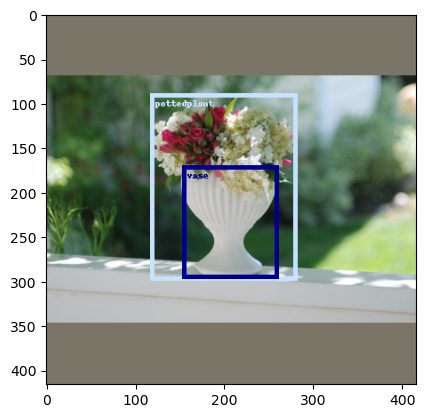

In [6]:
img_h = 416
img_w = 416
letterbox = True
fill = (123.0, 117.0, 104.0)
min_size = 1.0

from typing import Any, Callable, cast, Dict, List, Literal, Optional, Sequence, Tuple, Type, Union
from torchvision.transforms.v2 import functional as F, InterpolationMode
from torchvision.transforms.v2.functional._utils import _FillType
from torch.utils._pytree import tree_flatten, tree_unflatten
class Resize(v2.Resize):
    def __init__(
            self,
            letterbox: bool,
            fill:  Union[_FillType, Dict[Union[Type, str], _FillType]] = 0,
            **kwargs,  # params for v2.Resize
        ) -> None:
        super().__init__(**kwargs)
        self.size = self.size + self.size if len(self.size) == 1 else self.size
        self.letterbox = letterbox
        self.fill = fill
        self._fill = v2._utils._setup_fill_arg(fill)
        self.padding_mode = 'constant'  # only support constant padding mode for bounding boxes

    def _get_params(self, flat_inputs: List[Any]) -> Dict[str, Any]:
        orig_h, orig_w = v2._utils.query_size(flat_inputs)
        new_h, new_w = self.size
        if not self.letterbox:
            return dict(size=(new_h, new_w))
        else:  # do letterbox
            r_h, r_w = new_h / orig_h, new_w / orig_w
            r = min(r_h, r_w)
            new_unpad_h, new_unpad_w = round(orig_h * r), round(orig_w * r)
            pad_left = pad_right = pad_top = pad_bottom = 0
            if r_w < r_h:
                diff = new_h - new_unpad_h
                pad_top += (diff // 2)
                pad_bottom += (diff - pad_top)
            else:  # r_h <= r_w:
                diff = new_w - new_unpad_w
                pad_left += (diff // 2)
                pad_right += (diff - pad_left)
            padding = [pad_left, pad_top, pad_right, pad_bottom]
            return dict(size=(new_unpad_h, new_unpad_w), padding=padding)

    def _transform(self, inpt: Any, params: Dict[str, Any]) -> Any:
        inpt = self._call_kernel(F.resize, inpt, size=params['size'],
                                 interpolation=self.interpolation, antialias=self.antialias)
        if self.letterbox:
            fill = v2._utils._get_fill(self._fill, type(inpt))
            inpt = self._call_kernel(F.pad, inpt, padding=params["padding"], fill=fill, padding_mode=self.padding_mode)
        return inpt

transforms = v2.Compose(
    [
        v2.ToImage(),
        v2.RandomHorizontalFlip(),
        Resize(size=(img_h, img_w), letterbox=letterbox, fill={tv_tensors.Image: fill, "others": 0}, antialias=True),
        v2.ClampBoundingBoxes(),
        v2.SanitizeBoundingBoxes(min_size=min_size),
        v2.ToDtype(torch.float32, scale=True),
    ]
)
dataset_train = torchvision.datasets.CocoDetection(root='../data/coco/images/train2017',
                                                   annFile='../data/coco/annotations/instances_train2017.json',
                                                   transforms=transforms)
dataset_train_v2 = wrap_dataset_for_transforms_v2(dataset_train, target_keys=['boxes', 'labels'])
dataset_train_v2 = _coco_remove_images_without_annotations(dataset_train_v2)

x, y = dataset_train_v2[2]
print(f"{x.shape=}\n{y=}")
labels = [COCO_CATEGORIES[idx] for idx in y['labels']]
img = draw_bounding_boxes(v2.functional.to_dtype(x, torch.uint8, scale=True), labels=labels, boxes=y['boxes'],
                          colors=[palette[idx%len(palette)] for idx in y['labels']], width=5)
plt.imshow(img.permute(1, 2, 0).numpy())
plt.show()

## Custom target transform - label preprocess

loading annotations into memory...
Done (t=9.40s)
creating index...
index created!
x.shape=torch.Size([3, 640, 427])
y.shape=torch.Size([2, 6])
border.shape=torch.Size([4])
Transformed: y=tensor([[-1.0000, 23.0000,  0.3415,  0.5921,  0.6770,  0.7798],
        [-1.0000, 23.0000,  0.6084,  0.5563,  0.5469,  0.8874]])
Restored: y={'boxes': tensor([[  1.2900, 129.4400, 290.3700, 628.4900],
        [143.0400,  72.0700, 376.5500, 640.0000]]), 'labels': tensor([23, 23])}


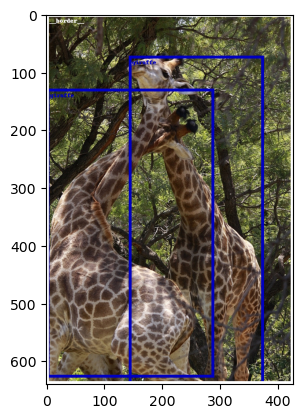

In [7]:
# ref: https://docs.ultralytics.com/reference/data/converter/#ultralytics.data.converter.coco91_to_coco80_class
# ref: https://github.com/pytorch/vision/blob/main/references/detection/train.py#L43

min_size = 1.0

def add_img_border_box(x, y):
    """
    Add a bounding box around the image, to record the image border transform.
    For clip boxes to non-pad region (within border box) to increase precision but not recall
    And handle sample without annotation by creating empty annotation plus border box.
    Args:
        x (PIL.Image.Image): size(H, W), RGB, 0~255
        y (Dict): v2 COCO annotation
            y['boxes'] (tv_tensors.BoundingBoxes): size(n_obj, 4), in pixels, XYXY format
            y['labels'] (Tensor): size(n_obj,), torch.int64, 1~n_class, with background class 0
    Returns:
        x (PIL.Image.Image): same as input
        y (Dict): v2 COCO annotation
            y['boxes'] (tv_tensors.BoundingBoxes): size(n_obj+1, 4), with the last box as the border box,
                in pixels, XYXY format
            y['labels'] (Tensor): size(n_obj+1,), with the last label as 0 (background class) for border box
    """
    img_w, img_h = x.size
    border_box = torch.tensor([0, 0, img_w-1, img_h-1]).view(1, 4)
    if 'boxes' in y and 'labels' in y:
        y['boxes'] = tv_tensors.wrap(torch.cat((y['boxes'], border_box), dim=0), like=y['boxes'])
        y['labels'] = torch.cat((y['labels'], torch.tensor([0], dtype=torch.int64)))
    else:  # handle no annotation by creating empty annotation plus border box
        y = {'boxes': tv_tensors.BoundingBoxes(border_box, format='xyxy', canvas_size=(img_h, img_w)),
             'labels': torch.tensor([0], dtype=torch.int64)}
    return x, y

class Coco2Yolov3(nn.Module):
    """
    Args:
        x (Tensor): size(3, img_h, img_w), RGB, 0~255
        y_coco (Dict): COCO annotation
            y_coco['boxes'] (tv_tensors.BoundingBoxes): size(n_ob + 1, 4), in pixels, XYXY format,
                with the last box as the border box
            y_coco['labels'] (Tensor): size(n_ob + 1j,), torch.int64, 0~91, 91 obj categories plus background class 0,
                with the last label as 0 (background class) for border box
    Returns:
        x (Tensor): size(3, img_h, img_w), RGB, 0~255
        y_yolov3 (Tensor): size(n_obj, 6), torch.float32
            y_yolov3[i, 0] is the idx of the image in the batch, 0~batch_size-1, init with -1, assigned in collate_fn
            y_yolov3[i, 1] is the class index for the i-th object box, 0.0~float(80-1), 80 obj categories w/o background class
            y_yolov3[i, 2:6] is the box coordinates for the i-th object box, normalized by img wh, CXCYWH format
        border (Tensor): size(4,), torch.float32, the border box normalized by img wh, XYXY format
    """
    COCO_91_to_80 = torch.tensor([  # from 91 obj categories (w/o background) category to 80 (w/o background) category
        0,
        1,
        2,
        3,
        4,
        5,
        6,
        7,
        8,
        9,
        10,
        float('nan'),
        11,
        12,
        13,
        14,
        15,
        16,
        17,
        18,
        19,
        20,
        21,
        22,
        23,
        float('nan'),
        24,
        25,
        float('nan'),
        float('nan'),
        26,
        27,
        28,
        29,
        30,
        31,
        32,
        33,
        34,
        35,
        36,
        37,
        38,
        39,
        float('nan'),
        40,
        41,
        42,
        43,
        44,
        45,
        46,
        47,
        48,
        49,
        50,
        51,
        52,
        53,
        54,
        55,
        56,
        57,
        58,
        59,
        float('nan'),
        60,
        float('nan'),
        float('nan'),
        61,
        float('nan'),
        62,
        63,
        64,
        65,
        66,
        67,
        68,
        69,
        70,
        71,
        72,
        float('nan'),
        73,
        74,
        75,
        76,
        77,
        78,
        79,
        float('nan'),
    ])

    COCO_CATEGORIES = [  # 80 obj categories (w/o background class)
        'person',
        'bicycle',
        'car',
        'motorcycle',
        'airplane',
        'bus',
        'train',
        'truck',
        'boat',
        'traffic light',
        'fire hydrant',
        'stop sign',
        'parking meter',
        'bench',
        'bird',
        'cat',
        'dog',
        'horse',
        'sheep',
        'cow',
        'elephant',
        'bear',
        'zebra',
        'giraffe',
        'backpack',
        'umbrella',
        'handbag',
        'tie',
        'suitcase',
        'frisbee',
        'skis',
        'snowboard',
        'sports ball',
        'kite',
        'baseball bat',
        'baseball glove',
        'skateboard',
        'surfboard',
        'tennis racket',
        'bottle',
        'wine glass',
        'cup',
        'fork',
        'knife',
        'spoon',
        'bowl',
        'banana',
        'apple',
        'sandwich',
        'orange',
        'broccoli',
        'carrot',
        'hot dog',
        'pizza',
        'donut',
        'cake',
        'chair',
        'couch',
        'potted plant',
        'bed',
        'dining table',
        'toilet',
        'tv',
        'laptop',
        'mouse',
        'remote',
        'keyboard',
        'cell phone',
        'microwave',
        'oven',
        'toaster',
        'sink',
        'refrigerator',
        'book',
        'clock',
        'vase',
        'scissors',
        'teddy bear',
        'hair drier',
        'toothbrush',
    ]

    def forward(self, x, y_coco):
        img_h, img_w = x.shape[-2:]
        cxcywh = box_convert(y_coco['boxes'][:-1], in_fmt='xyxy', out_fmt='cxcywh')  # :-1 to exclude border box
        cxcywhn = cxcywh / torch.tensor([img_w, img_h, img_w, img_h])
        n_obj = cxcywh.shape[0]
        y_yolov3 = torch.cat((
                torch.full((n_obj, 1), -1),
                self.COCO_91_to_80[y_coco['labels'][:-1] - 1].unsqueeze(1),  # - 1 to remove background class first
                cxcywhn
            ),
            dim=1
        ).to(torch.float32)
        border = y_coco['boxes'][-1] / torch.tensor([img_w, img_h, img_w, img_h], dtype=torch.float32)
        return x, y_yolov3, border

    @classmethod
    def inv_target_transform(self, x, y_yolov3):
        img_h, img_w = x.shape[-2:]
        cxcywh = y_yolov3[:, 2:6] * torch.tensor([img_w, img_h, img_w, img_h])
        xyxy = box_convert(cxcywh, in_fmt='cxcywh', out_fmt='xyxy')
        labels = y_yolov3[:, 1].to(torch.int64)
        y_coco = {'boxes': xyxy, 'labels': labels}
        return y_coco


transforms = v2.Compose([
    add_img_border_box,
    v2.ToImage(),
    v2.RandomHorizontalFlip(),
    v2.ClampBoundingBoxes(),
    v2.SanitizeBoundingBoxes(min_size=min_size),
    v2.ToDtype(torch.float32, scale=True),
    Coco2Yolov3(),
])

dataset_train = torchvision.datasets.CocoDetection(root='../data/coco/images/train2017',
                                                   annFile='../data/coco/annotations/instances_train2017.json',
                                                   transforms=transforms)
dataset_train_v2 = wrap_dataset_for_transforms_v2(dataset_train, target_keys=['boxes', 'labels'])

x, y, border = dataset_train_v2[10]
print(f"{x.shape=}\n{y.shape=}\n{border.shape=}")
print(f"Transformed: {y=}")
y = Coco2Yolov3.inv_target_transform(x, y)
print(f"Restored: {y=}")
labels = [Coco2Yolov3.COCO_CATEGORIES[idx] for idx in y['labels']]
img = draw_bounding_boxes(v2.functional.to_dtype(x, torch.uint8, scale=True),
                          labels=labels, boxes=y['boxes'],
                          colors=[palette[idx%len(palette)] for idx in y['labels']], width=5)
img_h, img_w = x.shape[-2:]
border = border * torch.tensor([img_w, img_h, img_w, img_h])
img = draw_bounding_boxes(img, labels=['__border__'], boxes=border.unsqueeze(0), colors=[(255, 255, 255)], width=5)
plt.imshow(img.permute(1, 2, 0).numpy())
plt.show()

x.shape=torch.Size([3, 480, 640])
y.shape=torch.Size([0, 6])
border.shape=torch.Size([4])
Transformed: y=tensor([], size=(0, 6))
Restored: y={'boxes': tensor([], size=(0, 4)), 'labels': tensor([], dtype=torch.int64)}


/home/alvin/miniconda3/envs/yolo/lib/python3.10/site-packages/torchvision/utils.py:209: UserWarning: boxes doesn't contain any box. No box was drawn
  warnings.warn("boxes doesn't contain any box. No box was drawn")


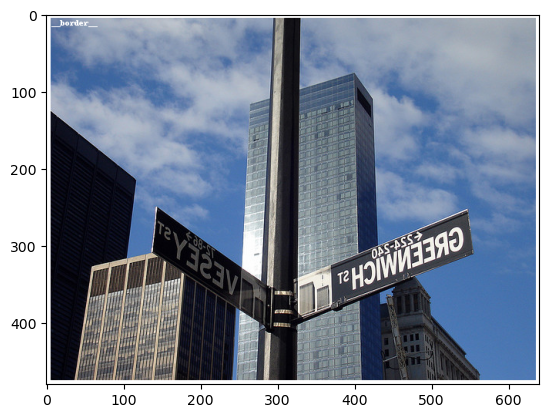

In [13]:
x, y, border = dataset_train_v2[42]  # example of no annotation
print(f"{x.shape=}\n{y.shape=}\n{border.shape=}")
print(f"Transformed: {y=}")
y = Coco2Yolov3.inv_target_transform(x, y)
print(f"Restored: {y=}")
labels = [Coco2Yolov3.COCO_CATEGORIES[idx] for idx in y['labels']]
img = draw_bounding_boxes(v2.functional.to_dtype(x, torch.uint8, scale=True),
                          labels=labels, boxes=y['boxes'],
                          colors=[palette[idx%len(palette)] for idx in y['labels']], width=5)
img_h, img_w = x.shape[-2:]
border = border * torch.tensor([img_w, img_h, img_w, img_h])
img = draw_bounding_boxes(img, labels=['__border__'], boxes=border.unsqueeze(0), colors=[(255, 255, 255)], width=5)
plt.imshow(img.permute(1, 2, 0).numpy())
plt.show()

## Dataloader & collate_fn

loading annotations into memory...


Done (t=8.36s)
creating index...
index created!
torch.Size([3, 416, 416])
torch.Size([3, 416, 416])
torch.Size([3, 416, 416])
X.shape=torch.Size([4, 3, 416, 416])
Y.shape=torch.Size([35, 6])
BORDER.shape=torch.Size([4, 4])
y=tensor([[ 1.0000,  0.0000,  0.5040,  0.4741,  0.9461,  0.8424],
        [ 1.0000, 36.0000,  0.7731,  0.6089,  0.3950,  0.1603]])


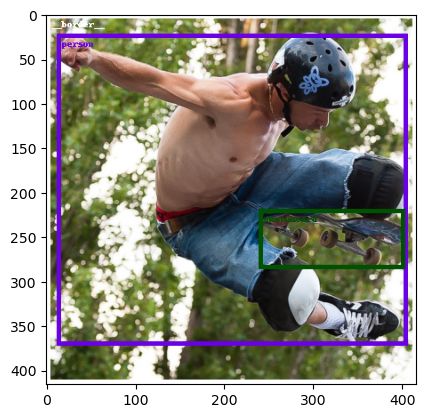

In [14]:
img_h = 416
img_w = 416
letterbox = True
fill = (123.0, 117.0, 104.0)
min_size = 1.0

dataset_train = torchvision.datasets.CocoDetection(
    root='../data/coco/images/train2017', annFile='../data/coco/annotations/instances_train2017.json',
    transforms=v2.Compose([
        add_img_border_box,
        v2.ToImage(),
        v2.RandomHorizontalFlip(),
        Resize(size=(img_h, img_w), letterbox=letterbox, fill={tv_tensors.Image: fill, "others": 0}, antialias=True),
        v2.ClampBoundingBoxes(),
        v2.SanitizeBoundingBoxes(min_size=min_size),
        v2.ToDtype(torch.float32, scale=True),
        Coco2Yolov3(),
    ])
)
dataset_train_v2 = wrap_dataset_for_transforms_v2(dataset_train, target_keys=['boxes', 'labels'])
print(dataset_train_v2[10][0].shape)
print(dataset_train_v2[11][0].shape)
print(dataset_train_v2[12][0].shape)


def coco_collate_fn(batch):
    xs, ys, borders = zip(*batch)
    for idx_img, y in enumerate(ys):
        y[:, 0] = idx_img
    return torch.stack(xs, dim=0), torch.cat(ys, dim=0), torch.stack(borders, dim=0)

dataloader_train = dataloader.DataLoader(dataset_train_v2, batch_size=4, shuffle=True, num_workers=0,
                                         collate_fn=coco_collate_fn)
X, Y, BORDER = next(iter(dataloader_train))
print(f"{X.shape=}\n{Y.shape=}\n{BORDER.shape=}")

idx_img = 1
x, y = X[idx_img], Y[Y[:, 0]==idx_img]
print(f"{y=}")
y = Coco2Yolov3.inv_target_transform(x, y)
labels = [Coco2Yolov3.COCO_CATEGORIES[idx] for idx in y['labels']]
img = draw_bounding_boxes(v2.functional.to_dtype(x, torch.uint8, scale=True),
                          labels=labels, boxes=y['boxes'],
                          colors=[palette[idx%len(palette)] for idx in y['labels']], width=5)
border = BORDER[idx_img] * torch.tensor([img_w, img_h, img_w, img_h])
img = draw_bounding_boxes(img, labels=['__border__'], boxes=border.unsqueeze(0), colors=[(255, 255, 255)], width=5)
plt.imshow(img.permute(1, 2, 0).numpy())
plt.show()

In [16]:
%%timeit
X, Y, BORDER = next(iter(dataloader_train))

20.8 ms ± 1.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [17]:
idx_img = 0
for xs, ys, borders in tqdm(dataloader_train):  # verify if all training images can be loaded
    idx_img += xs.shape[0]
print(f"{idx_img = }")  # 118287

100%|██████████| 29572/29572 [08:58<00:00, 54.88it/s]

idx_img = 118287


## Val transforms

NOTE: Cannot use _coco_remove_images_without_annotations for fair validation

loading annotations into memory...
Done (t=0.19s)
creating index...
index created!
X.shape=torch.Size([1, 3, 416, 416])
Y.shape=torch.Size([20, 6])
BORDER.shape=torch.Size([1, 4])
y=tensor([[0.0000e+00, 5.8000e+01, 3.8958e-01, 4.4293e-01, 3.8594e-02, 1.0863e-01],
        [0.0000e+00, 6.2000e+01, 1.2764e-01, 5.0223e-01, 2.3331e-01, 1.4829e-01],
        [0.0000e+00, 6.2000e+01, 9.3420e-01, 5.5437e-01, 1.2711e-01, 1.2306e-01],
        [0.0000e+00, 5.6000e+01, 6.0466e-01, 5.8706e-01, 8.7500e-02, 1.6073e-01],
        [0.0000e+00, 5.6000e+01, 5.0251e-01, 5.8358e-01, 9.6609e-02, 1.5393e-01],
        [0.0000e+00, 5.6000e+01, 6.6920e-01, 5.7803e-01, 4.7141e-02, 1.2717e-01],
        [0.0000e+00, 5.6000e+01, 5.1280e-01, 5.1761e-01, 3.3719e-02, 1.8116e-02],
        [0.0000e+00, 0.0000e+00, 6.8645e-01, 5.2008e-01, 8.2891e-02, 2.1572e-01],
        [0.0000e+00, 0.0000e+00, 6.1248e-01, 4.6297e-01, 2.3625e-02, 5.5864e-02],
        [0.0000e+00, 6.8000e+01, 8.1186e-01, 4.9995e-01, 2.3031e-02, 2.4962e-02]

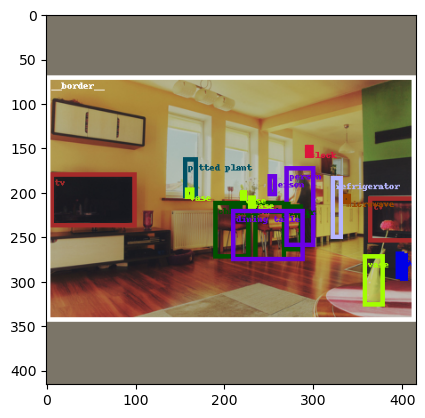

In [18]:
img_h = 416
img_w = 416
letterbox = True
fill = (123.0, 117.0, 104.0)
min_size = 1.0

dataset_val = torchvision.datasets.CocoDetection(
    root='../data/coco/images/val2017', annFile='../data/coco/annotations/instances_val2017.json',
    transforms=v2.Compose([
        add_img_border_box,
        v2.ToImage(),
        Resize(size=(img_h, img_w), letterbox=letterbox, fill={tv_tensors.Image: fill, "others": 0}, antialias=True),
        v2.ClampBoundingBoxes(),
        v2.SanitizeBoundingBoxes(min_size=min_size),
        v2.ToDtype(torch.float32, scale=True),
        Coco2Yolov3(),
    ])
)
dataset_val_v2 = wrap_dataset_for_transforms_v2(dataset_val, target_keys=['boxes', 'labels'])
# NOTE: don't remove images without annotations for fair validation

dataloader_val = dataloader.DataLoader(dataset_val_v2, batch_size=1, shuffle=False, num_workers=0,
                                       collate_fn=coco_collate_fn)
X, Y, BORDER = next(iter(dataloader_val))
print(f"{X.shape=}\n{Y.shape=}\n{BORDER.shape=}")

idx_img = 0
x, y = X[idx_img], Y[Y[:, 0]==idx_img]
print(f"{y=}")
y = Coco2Yolov3.inv_target_transform(x, y)
labels = [Coco2Yolov3.COCO_CATEGORIES[idx] for idx in y['labels']]
img = draw_bounding_boxes(v2.functional.to_dtype(x, torch.uint8, scale=True),
                          labels=labels, boxes=y['boxes'],
                          colors=[palette[idx%len(palette)] for idx in y['labels']], width=5)
border = BORDER[idx_img] * torch.tensor([img_w, img_h, img_w, img_h])
img = draw_bounding_boxes(img, labels=['__border__'], boxes=border.unsqueeze(0), colors=[(255, 255, 255)], width=5)
plt.imshow(img.permute(1, 2, 0).numpy())
plt.show()

x.shape=torch.Size([3, 416, 416])
y.shape=torch.Size([0, 6])
border.shape=torch.Size([4])
Transformed: y=tensor([], size=(0, 6))
Restored: y={'boxes': tensor([], size=(0, 4)), 'labels': tensor([], dtype=torch.int64)}


/home/alvin/miniconda3/envs/yolo/lib/python3.10/site-packages/torchvision/utils.py:209: UserWarning: boxes doesn't contain any box. No box was drawn
  warnings.warn("boxes doesn't contain any box. No box was drawn")


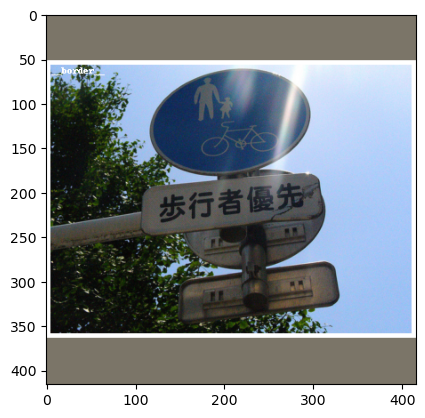

In [19]:
x, y, border = dataset_val_v2[250]  # example of no annotation
print(f"{x.shape=}\n{y.shape=}\n{border.shape=}")
print(f"Transformed: {y=}")
y = Coco2Yolov3.inv_target_transform(x, y)
print(f"Restored: {y=}")
labels = [Coco2Yolov3.COCO_CATEGORIES[idx] for idx in y['labels']]
img = draw_bounding_boxes(v2.functional.to_dtype(x, torch.uint8, scale=True),
                          labels=labels, boxes=y['boxes'],
                          colors=[palette[idx%len(palette)] for idx in y['labels']], width=5)
img_h, img_w = x.shape[-2:]
border = border * torch.tensor([img_w, img_h, img_w, img_h])
img = draw_bounding_boxes(img, labels=['__border__'], boxes=border.unsqueeze(0), colors=[(255, 255, 255)], width=5)
plt.imshow(img.permute(1, 2, 0).numpy())
plt.show()

In [21]:
idx_img = 0
for xs, ys, borders in tqdm(dataloader_val):  # verify if all validation images can be loaded
    idx_img += xs.shape[0]
print(f"{idx_img = }")  # 5000

100%|██████████| 5000/5000 [00:21<00:00, 228.50it/s]

idx_img = 5000


## Inspect training transforms

### Default train transforms

FUTURE:

- Mosaic & Mixup
- Random interpolation

x.shape=torch.Size([3, 416, 416])
y.shape=torch.Size([11, 6])
border.shape=torch.Size([4])
Transformed: y=tensor([[-1.0000e+00,  5.6000e+01,  4.6047e-01,  6.0377e-01,  9.9568e-02,
          1.2422e-01],
        [-1.0000e+00,  0.0000e+00,  4.5802e-01,  6.0145e-01,  9.8810e-02,
          1.2596e-01],
        [-1.0000e+00,  0.0000e+00,  5.5152e-01,  5.8509e-01,  6.9054e-02,
          1.6239e-01],
        [-1.0000e+00,  0.0000e+00,  6.0643e-01,  5.8065e-01,  6.2519e-02,
          1.6741e-01],
        [-1.0000e+00,  2.6000e+01,  6.6585e-01,  6.4207e-01,  2.8056e-02,
          4.9526e-02],
        [-1.0000e+00,  2.6000e+01,  5.4312e-01,  5.9161e-01,  4.4252e-02,
          4.0162e-02],
        [-1.0000e+00,  2.6000e+01,  4.6048e-01,  6.0678e-01,  2.9024e-02,
          7.8139e-03],
        [-1.0000e+00,  6.7000e+01,  5.5812e-01,  5.2778e-01,  8.7129e-03,
          1.3430e-02],
        [-1.0000e+00,  6.7000e+01,  6.2192e-01,  5.2158e-01,  1.8426e-02,
          2.4998e-02],
        [-1.0000e+00,

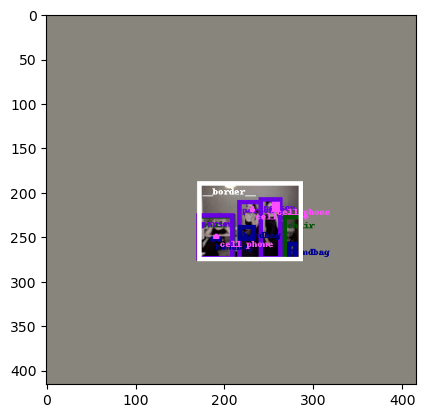

In [53]:
img_h = 416
img_w = 416
letterbox = True
fill = (123.0, 117.0, 104.0)
brightness = 0.4
contrast = 0.4
saturation = 0.7
hue = 0.015
blur_p = 0.01
blur_size_min = 3
blur_size_max = 7
blur_sigma_min = 0.1
blur_sigma_max = 2.0
grayscale_p = 0.01
autocontrast_p = 0.01
perspective = 0.0
translate = 0.1
scale = 0.9
shear = 0.0  # unit: deg
degrees = 0.0  # unit: deg
crop_scale = 0.8
ratio_min = 0.5
ratio_max = 2.0
flip_p = 0.5
min_size = 1.0
imgs_mean = (0.0, 0.0, 0.0)
imgs_std = (1.0, 1.0, 1.0)

transforms = v2.Compose([
    add_img_border_box,
    Resize(size=(img_h, img_w), letterbox=letterbox, fill=fill,
           interpolation=InterpolationMode.BILINEAR, antialias=True),
    v2.RandomPerspective(distortion_scale=perspective, fill=fill, interpolation=InterpolationMode.BILINEAR),
    v2.RandomAffine(degrees=degrees, translate=(translate, translate), scale=(1 - scale, 1 + scale * crop_scale),
                    shear=(-shear, shear, -shear, shear), fill=fill, interpolation=InterpolationMode.BILINEAR),
    v2.ToImage(),
    v2.RandomResizedCrop(size=(img_h, img_w), scale=(crop_scale, 1.0), ratio=(ratio_min, ratio_max),
                         interpolation=InterpolationMode.BILINEAR, antialias=True),
    v2.RandomApply([
        v2.GaussianBlur(kernel_size=(blur_size_min, blur_size_max), sigma=(blur_sigma_min, blur_sigma_max)),
    ], p=blur_p),
    v2.RandomGrayscale(p=grayscale_p),
    v2.RandomAutocontrast(p=autocontrast_p),
    v2.ColorJitter(brightness=brightness, contrast=contrast, saturation=saturation, hue=hue),
    v2.RandomHorizontalFlip(p=flip_p),
    v2.ClampBoundingBoxes(),
    v2.SanitizeBoundingBoxes(min_size=min_size),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=imgs_mean, std=imgs_std),
    Coco2Yolov3(),
])

dataset_train = torchvision.datasets.CocoDetection(
    root='../data/coco/images/train2017', annFile='../data/coco/annotations/instances_train2017.json',
    transforms=transforms
)
dataset_train_v2 = wrap_dataset_for_transforms_v2(dataset_train, target_keys=['boxes', 'labels'])

x, y, border = dataset_train_v2[99]
print(f"{x.shape=}\n{y.shape=}\n{border.shape=}")
print(f"Transformed: {y=}")
y = Coco2Yolov3.inv_target_transform(x, y)
print(f"Restored: {y=}")
labels = [Coco2Yolov3.COCO_CATEGORIES[idx] for idx in y['labels']]
img = draw_bounding_boxes(v2.functional.to_dtype(x, torch.uint8, scale=True),
                          labels=labels, boxes=y['boxes'],
                          colors=[palette[idx%len(palette)] for idx in y['labels']], width=5)
img_h, img_w = x.shape[-2:]
border = border * torch.tensor([img_w, img_h, img_w, img_h])
img = draw_bounding_boxes(img, labels=['__border__'], boxes=border.unsqueeze(0), colors=[(255, 255, 255)], width=5)
plt.imshow(img.permute(1, 2, 0).numpy())
plt.show()

### Dummy train transforms

loading annotations into memory...
Done (t=10.37s)
creating index...
index created!
x.shape=torch.Size([3, 416, 416])
y.shape=torch.Size([11, 6])
border.shape=torch.Size([4])
Transformed: y=tensor([[-1.0000e+00,  5.6000e+01,  8.1825e-01,  6.5345e-01,  3.4895e-01,
          4.3645e-01],
        [-1.0000e+00,  0.0000e+00,  8.2685e-01,  6.4528e-01,  3.4629e-01,
          4.4257e-01],
        [-1.0000e+00,  0.0000e+00,  4.9915e-01,  5.8779e-01,  2.4201e-01,
          5.7058e-01],
        [-1.0000e+00,  0.0000e+00,  3.0674e-01,  5.7219e-01,  2.1911e-01,
          5.8821e-01],
        [-1.0000e+00,  2.6000e+01,  9.8493e-02,  7.8799e-01,  9.8326e-02,
          1.7402e-01],
        [-1.0000e+00,  2.6000e+01,  5.2859e-01,  6.1069e-01,  1.5509e-01,
          1.4112e-01],
        [-1.0000e+00,  2.6000e+01,  8.1823e-01,  6.6400e-01,  1.0172e-01,
          2.7455e-02],
        [-1.0000e+00,  6.7000e+01,  4.7605e-01,  3.8643e-01,  3.0536e-02,
          4.7187e-02],
        [-1.0000e+00,  6.7000e+01,

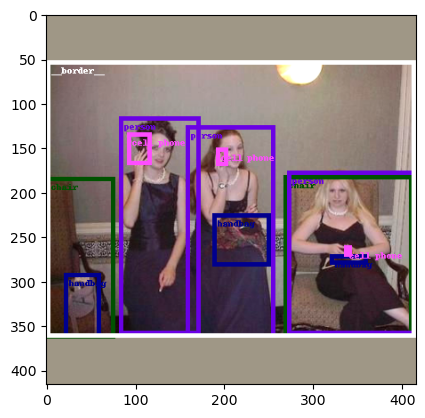

In [24]:
letterbox = True
fill = (123.0, 117.0, 104.0)
brightness = 0.9
contrast = 0.0
saturation = 0.0
hue = 0.0
blur_p = 0.0
blur_size_min = 3
blur_size_max = 7
blur_sigma_min = 0.1
blur_sigma_max = 2.0
grayscale_p = 0.0
autocontrast_p = 0.0
perspective = 0.0
translate = 0.0
scale = 0.0
shear = 0.0  # unit: deg
degrees = 0.0  # unit: deg
crop_scale = 1.0
ratio_min = 1.0
ratio_max = 1.0
flip_p = 0.0
min_size = 1.0
imgs_mean = (0.0, 0.0, 0.0)
imgs_std = (1.0, 1.0, 1.0)

transforms = v2.Compose([
    add_img_border_box,
    Resize(size=(img_h, img_w), letterbox=letterbox, fill=fill,
           interpolation=InterpolationMode.BILINEAR, antialias=True),
    v2.RandomPerspective(distortion_scale=perspective, fill=fill, interpolation=InterpolationMode.BILINEAR),
    v2.RandomAffine(degrees=degrees, translate=(translate, translate), scale=(1 - scale, 1 + scale * crop_scale),
                    shear=(-shear, shear, -shear, shear), fill=fill, interpolation=InterpolationMode.BILINEAR),
    v2.ToImage(),
    v2.RandomResizedCrop(size=(img_h, img_w), scale=(crop_scale, 1.0), ratio=(ratio_min, ratio_max),
                         interpolation=InterpolationMode.BILINEAR, antialias=True),
    v2.RandomApply([
        v2.GaussianBlur(kernel_size=(blur_size_min, blur_size_max), sigma=(blur_sigma_min, blur_sigma_max)),
    ], p=blur_p),
    v2.RandomGrayscale(p=grayscale_p),
    v2.RandomAutocontrast(p=autocontrast_p),
    v2.ColorJitter(brightness=brightness, contrast=contrast, saturation=saturation, hue=hue),
    v2.RandomHorizontalFlip(p=flip_p),
    v2.ClampBoundingBoxes(),
    v2.SanitizeBoundingBoxes(min_size=min_size),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=imgs_mean, std=imgs_std),
    Coco2Yolov3(),
])

dataset_train = torchvision.datasets.CocoDetection(
    root='../data/coco/images/train2017', annFile='../data/coco/annotations/instances_train2017.json',
    transforms=transforms
)
dataset_train_v2 = wrap_dataset_for_transforms_v2(dataset_train, target_keys=['boxes', 'labels'])

x, y, border = dataset_train_v2[99]
print(f"{x.shape=}\n{y.shape=}\n{border.shape=}")
print(f"Transformed: {y=}")
y = Coco2Yolov3.inv_target_transform(x, y)
print(f"Restored: {y=}")
labels = [Coco2Yolov3.COCO_CATEGORIES[idx] for idx in y['labels']]
img = draw_bounding_boxes(v2.functional.to_dtype(x, torch.uint8, scale=True),
                          labels=labels, boxes=y['boxes'],
                          colors=[palette[idx%len(palette)] for idx in y['labels']], width=5)
img_h, img_w = x.shape[-2:]
border = border * torch.tensor([img_w, img_h, img_w, img_h])
img = draw_bounding_boxes(img, labels=['__border__'], boxes=border.unsqueeze(0), colors=[(255, 255, 255)], width=5)
plt.imshow(img.permute(1, 2, 0).numpy())
plt.show()

### Blank transforms

loading annotations into memory...
Done (t=7.81s)
creating index...
index created!
x.shape=torch.Size([3, 416, 416])
y.shape=torch.Size([11, 6])
border.shape=torch.Size([4])
Transformed: y=tensor([[-1.0000e+00,  5.6000e+01,  8.1825e-01,  6.5345e-01,  3.4895e-01,
          4.3645e-01],
        [-1.0000e+00,  0.0000e+00,  8.2685e-01,  6.4528e-01,  3.4629e-01,
          4.4257e-01],
        [-1.0000e+00,  0.0000e+00,  4.9915e-01,  5.8779e-01,  2.4201e-01,
          5.7058e-01],
        [-1.0000e+00,  0.0000e+00,  3.0674e-01,  5.7219e-01,  2.1911e-01,
          5.8821e-01],
        [-1.0000e+00,  2.6000e+01,  9.8493e-02,  7.8799e-01,  9.8326e-02,
          1.7402e-01],
        [-1.0000e+00,  2.6000e+01,  5.2859e-01,  6.1069e-01,  1.5509e-01,
          1.4112e-01],
        [-1.0000e+00,  2.6000e+01,  8.1823e-01,  6.6400e-01,  1.0172e-01,
          2.7455e-02],
        [-1.0000e+00,  6.7000e+01,  4.7605e-01,  3.8643e-01,  3.0536e-02,
          4.7187e-02],
        [-1.0000e+00,  6.7000e+01, 

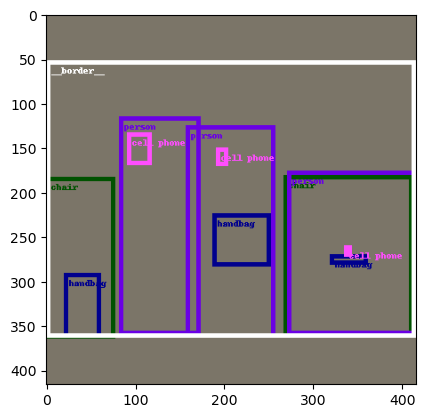

In [25]:
letterbox = True
fill = (123.0, 117.0, 104.0)
min_size = 1.0
imgs_mean = (0.0, 0.0, 0.0)
imgs_std = (1.0, 1.0, 1.0)

transforms = v2.Compose([
    add_img_border_box,
    v2.ToImage(),
    v2.Lambda(lambda inp: tv_tensors.wrap(torch.tensor(fill, dtype=inp.dtype, device=inp.device).view(3, 1, 1).expand(inp.shape),
                                          like=inp)
              if isinstance(inp, tv_tensors.Image) else inp),
    Resize(size=(img_h, img_w), letterbox=letterbox, fill={tv_tensors.Image: fill, "others": 0}, antialias=True),
    v2.ClampBoundingBoxes(),
    v2.SanitizeBoundingBoxes(min_size=min_size),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=imgs_mean, std=imgs_std),
    Coco2Yolov3(),
])

dataset_train = torchvision.datasets.CocoDetection(
    root='../data/coco/images/train2017', annFile='../data/coco/annotations/instances_train2017.json',
    transforms=transforms
)
dataset_train_v2 = wrap_dataset_for_transforms_v2(dataset_train, target_keys=['boxes', 'labels'])

x, y, border = dataset_train_v2[99]
print(f"{x.shape=}\n{y.shape=}\n{border.shape=}")
print(f"Transformed: {y=}")
y = Coco2Yolov3.inv_target_transform(x, y)
print(f"Restored: {y=}")
labels = [Coco2Yolov3.COCO_CATEGORIES[idx] for idx in y['labels']]
img = draw_bounding_boxes(v2.functional.to_dtype(x, torch.uint8, scale=True),
                          labels=labels, boxes=y['boxes'],
                          colors=[palette[idx%len(palette)] for idx in y['labels']], width=5)
img_h, img_w = x.shape[-2:]
border = border * torch.tensor([img_w, img_h, img_w, img_h])
img = draw_bounding_boxes(img, labels=['__border__'], boxes=border.unsqueeze(0), colors=[(255, 255, 255)], width=5)
plt.imshow(img.permute(1, 2, 0).numpy())
plt.show()

### Mimic SannaPersson (albumentations) train transforms
ref.: https://github.com/SannaPersson/YOLOv3-PyTorch/blob/main/config.py

x.shape=torch.Size([3, 416, 416])
y.shape=torch.Size([11, 6])
border.shape=torch.Size([4])
Transformed: y=tensor([[-1.0000e+00,  5.6000e+01,  8.2863e-01,  7.3063e-01,  3.4274e-01,
          5.3008e-01],
        [-1.0000e+00,  0.0000e+00,  8.3441e-01,  7.2355e-01,  3.3118e-01,
          5.3610e-01],
        [-1.0000e+00,  0.0000e+00,  5.2133e-01,  6.0092e-01,  3.2160e-01,
          6.5284e-01],
        [-1.0000e+00,  0.0000e+00,  3.0788e-01,  5.4825e-01,  2.9762e-01,
          6.6733e-01],
        [-1.0000e+00,  2.6000e+01,  5.9325e-02,  7.3898e-01,  1.1865e-01,
          2.0370e-01],
        [-1.0000e+00,  2.6000e+01,  5.5215e-01,  6.3083e-01,  1.8588e-01,
          1.7931e-01],
        [-1.0000e+00,  2.6000e+01,  8.7076e-01,  7.4186e-01,  1.1605e-01,
          4.8295e-02],
        [-1.0000e+00,  6.7000e+01,  5.1366e-01,  3.8221e-01,  3.8345e-02,
          5.5963e-02],
        [-1.0000e+00,  6.7000e+01,  2.6592e-01,  3.1709e-01,  8.0015e-02,
          1.0562e-01],
        [-1.0000e+00,

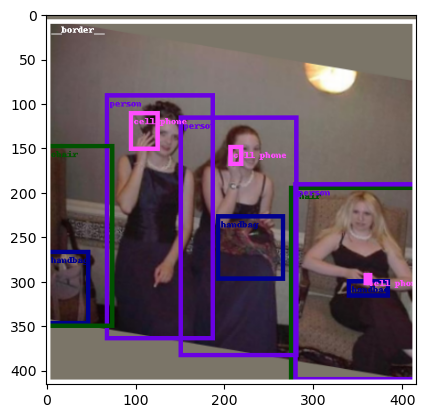

In [43]:
letterbox = True
fill = (123.0, 117.0, 104.0)
color_p = 0.4
brightness = 0.6
contrast = 0.6
saturation = 0.6
hue = 0.3
blur_p = 0.1
blur_size_min = 3
blur_size_max = 7
blur_sigma_min = 0.1
blur_sigma_max = 2.0
autocontrast_p = 0.1
posterize_p = 0.1
posterize_bits = 4
grayscale_p = 0.1
channelshuffle_p = 0.05
perspective_p = 0.4
perspective = 0.0
translate = 0.0625
scale = 0.1
shear_p = 0.4
shear = 10.0  # unit: deg
rotate_p = 0.4
degrees = 10.0  # unit: deg
crop_scale = 0.8
ratio_min = 0.5
ratio_max = 2.0
flip_p = 0.5
min_size = 1.0
imgs_mean = (0.0, 0.0, 0.0)
imgs_std = (1.0, 1.0, 1.0)

transforms = v2.Compose([
    add_img_border_box,
    v2.RandomApply([
        v2.ColorJitter(brightness=brightness, contrast=contrast, saturation=saturation, hue=hue),
    ], p=color_p),
    v2.RandomApply([
        v2.GaussianBlur(kernel_size=(blur_size_min, blur_size_max), sigma=(blur_sigma_min, blur_sigma_max)),
    ], p=blur_p),
    v2.RandomAutocontrast(p=autocontrast_p),
    v2.RandomPosterize(bits=posterize_bits, p=posterize_p),
    v2.RandomGrayscale(p=grayscale_p),
    v2.RandomApply([v2.RandomChannelPermutation(),], p=channelshuffle_p),
    Resize(size=(img_h, img_w), letterbox=letterbox, fill=fill,
           interpolation=InterpolationMode.BILINEAR, antialias=True),
    v2.RandomApply([
        v2.RandomPerspective(distortion_scale=perspective, fill=fill, interpolation=InterpolationMode.BILINEAR),
    ], p=perspective_p),
    v2.RandomChoice([
        v2.RandomApply([
            v2.RandomAffine(degrees=0.0, translate=(translate, translate), scale=(1 - scale, 1 + scale * crop_scale),
                            shear=(-shear, shear, -shear, shear), fill=fill, interpolation=InterpolationMode.BILINEAR),
        ], p=shear_p),
        v2.RandomApply([
            v2.RandomAffine(degrees=degrees, translate=(translate, translate), scale=(1 - scale, 1 + scale * crop_scale),
                            shear=None, fill=fill, interpolation=InterpolationMode.BILINEAR),
        ], p=rotate_p),
    ]),
    v2.ToImage(),
    v2.RandomResizedCrop(size=(img_h, img_w), scale=(crop_scale, 1.0), ratio=(ratio_min, ratio_max),
                         interpolation=InterpolationMode.BILINEAR, antialias=True),
    v2.RandomHorizontalFlip(p=flip_p),
    v2.ClampBoundingBoxes(),
    v2.SanitizeBoundingBoxes(min_size=min_size),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=imgs_mean, std=imgs_std),
    Coco2Yolov3(),
])

dataset_train = torchvision.datasets.CocoDetection(
    root='../data/coco/images/train2017', annFile='../data/coco/annotations/instances_train2017.json',
    transforms=transforms
)
dataset_train_v2 = wrap_dataset_for_transforms_v2(dataset_train, target_keys=['boxes', 'labels'])

x, y, border = dataset_train_v2[99]
print(f"{x.shape=}\n{y.shape=}\n{border.shape=}")
print(f"Transformed: {y=}")
y = Coco2Yolov3.inv_target_transform(x, y)
print(f"Restored: {y=}")
labels = [Coco2Yolov3.COCO_CATEGORIES[idx] for idx in y['labels']]
img = draw_bounding_boxes(v2.functional.to_dtype(x, torch.uint8, scale=True),
                          labels=labels, boxes=y['boxes'],
                          colors=[palette[idx%len(palette)] for idx in y['labels']], width=5)
img_h, img_w = x.shape[-2:]
border = border * torch.tensor([img_w, img_h, img_w, img_h])
img = draw_bounding_boxes(img, labels=['__border__'], boxes=border.unsqueeze(0), colors=[(255, 255, 255)], width=5)
plt.imshow(img.permute(1, 2, 0).numpy())
plt.show()

## Inspect multi-scale

In [61]:
img_h = 416
img_w = 416
letterbox = True
fill = (123.0, 117.0, 104.0)
min_size = 1.0

dataset_train = torchvision.datasets.CocoDetection(
    root='../data/coco/images/train2017', annFile='../data/coco/annotations/instances_train2017.json',
    transforms=v2.Compose([
        add_img_border_box,
        v2.ToImage(),
        v2.RandomHorizontalFlip(),
        Resize(size=(img_h, img_w), letterbox=letterbox, fill={tv_tensors.Image: fill, "others": 0}, antialias=True),
        v2.ClampBoundingBoxes(),
        v2.SanitizeBoundingBoxes(min_size=min_size),
        v2.ToDtype(torch.float32, scale=True),
        Coco2Yolov3(),
    ])
)
dataset_train_v2 = wrap_dataset_for_transforms_v2(dataset_train, target_keys=['boxes', 'labels'])
print(dataset_train_v2[10][0].shape)
print(dataset_train_v2[11][0].shape)
print(dataset_train_v2[12][0].shape)


def coco_collate_fn(batch):
    xs, ys, borders = zip(*batch)
    for idx_img, y in enumerate(ys):
        y[:, 0] = idx_img
    return torch.stack(xs, dim=0), torch.cat(ys, dim=0), torch.stack(borders, dim=0)

dataloader_train = dataloader.DataLoader(dataset_train_v2, batch_size=4, shuffle=True, num_workers=0,
                                         collate_fn=coco_collate_fn)
dataiter_train = iter(dataloader_train)

loading annotations into memory...
Done (t=10.10s)
creating index...
index created!
torch.Size([3, 416, 416])
torch.Size([3, 416, 416])
torch.Size([3, 416, 416])


In [62]:
multiscale_h = (320, 352, 384, 416, 448, 480, 512, 544, 576, 608)
multiscale_w = (320, 352, 384, 416, 448, 480, 512, 544, 576, 608)
iter_num = 0
multiscale_img_h, multiscale_img_w = img_h, img_w
idx_multiscale = multiscale_h.index(img_h)  # for printing when debug, no need for actual use

iter_num=10: idx_multiscale=7
X.shape=torch.Size([4, 3, 544, 544])
Y.shape=torch.Size([56, 6])
BORDER.shape=torch.Size([4, 4])
y=tensor([[1.0000e+00, 0.0000e+00, 4.5646e-01, 5.1735e-01, 1.7958e-01, 4.6195e-01],
        [1.0000e+00, 3.8000e+01, 5.8423e-01, 3.5891e-01, 1.0244e-01, 7.5853e-02],
        [1.0000e+00, 3.2000e+01, 6.0419e-01, 3.5503e-01, 2.1062e-02, 2.1215e-02]])


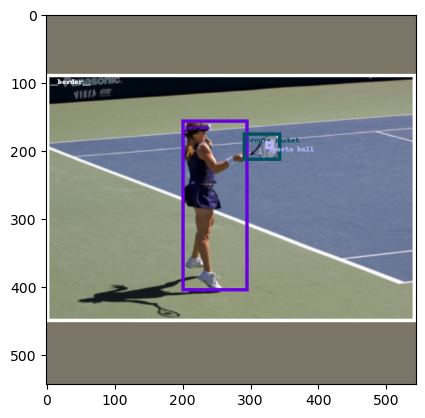

In [73]:
X, Y, BORDER = next(iter(dataloader_train))
# Multi-scale training, select new img size every 10 iterations
if iter_num > 0 and iter_num % 10 == 0:
    idx_multiscale = torch.randint(0, len(multiscale_h), (1,)).item()
    multiscale_img_h, multiscale_img_w = multiscale_h[idx_multiscale], multiscale_w[idx_multiscale]
print(f"{iter_num=}: {idx_multiscale=}")
X = nn.functional.interpolate(X, size=(multiscale_img_h, multiscale_img_w), mode='bilinear', align_corners=False)
print(f"{X.shape=}\n{Y.shape=}\n{BORDER.shape=}")

idx_img = 1
x, y = X[idx_img], Y[Y[:, 0]==idx_img]
print(f"{y=}")
y = Coco2Yolov3.inv_target_transform(x, y)
labels = [Coco2Yolov3.COCO_CATEGORIES[idx] for idx in y['labels']]
img = draw_bounding_boxes(v2.functional.to_dtype(x, torch.uint8, scale=True),
                          labels=labels, boxes=y['boxes'],
                          colors=[palette[idx%len(palette)] for idx in y['labels']], width=5)
border = BORDER[idx_img] * torch.tensor([multiscale_img_w, multiscale_img_h, multiscale_img_w, multiscale_img_h])
img = draw_bounding_boxes(img, labels=['__border__'], boxes=border.unsqueeze(0), colors=[(255, 255, 255)], width=5)
plt.imshow(img.permute(1, 2, 0).numpy())
plt.show()

iter_num += 1